In [ ]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qa_qc_lib.qa_qc_seismic import *

In [ ]:
def generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length):
    if num_sides < 3:
        raise ValueError("A polygon must have at least 3 sides.")

    # Generate random side lengths
    side_lengths = np.random.uniform(min_side_length, max_side_length, num_sides)

    # Calculate the total perimeter of the polygon
    total_perimeter = np.sum(side_lengths)

    # Calculate the angles between the sides
    angles = np.random.uniform(0, 360, num_sides)

    # Generate the cumulative angles for vertex positions
    cumulative_angles = np.cumsum(angles)

    # Generate the coordinates of the polygon vertices
    x_coords = total_perimeter * np.cos(np.radians(cumulative_angles))
    y_coords = total_perimeter * np.sin(np.radians(cumulative_angles))

    # Close the polygon
    x_coords = np.append(x_coords, x_coords[0])
    y_coords = np.append(y_coords, y_coords[0])

    # Check if any of the sides intersect, and if so, regenerate the polygon
    for i in range(num_sides):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % num_sides], y_coords[(i + 1) % num_sides]
        for j in range(i + 2, num_sides):
            x3, y3 = x_coords[j], y_coords[j]
            x4, y4 = x_coords[(j + 1) % num_sides], y_coords[(j + 1) % num_sides]
            if do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
                return generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

    return x_coords, y_coords

def do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    # Check if two line segments intersect using the cross product method
    def cross_product(x1, y1, x2, y2):
        return x1 * y2 - x2 * y1

    d1 = cross_product(x4 - x3, y4 - y3, x1 - x3, y1 - y3)
    d2 = cross_product(x4 - x3, y4 - y3, x2 - x3, y2 - y3)
    d3 = cross_product(x2 - x1, y2 - y1, x3 - x1, y3 - y1)
    d4 = cross_product(x2 - x1, y2 - y1, x4 - x1, y4 - y1)

    if (d1 * d2 < 0) and (d3 * d4 < 0):
        return True
    return False


def add_noise_to_polygon(polygon_points, noise_factor=0.1):
    x_coords, y_coords = zip(*polygon_points)
    noise_x = np.random.uniform(-noise_factor, noise_factor, len(x_coords))
    noise_y = np.random.uniform(-noise_factor, noise_factor, len(y_coords))

    x_coords_noisy = [x + noise for x, noise in zip(x_coords, noise_x)]
    y_coords_noisy = [y + noise for y, noise in zip(y_coords, noise_y)]

    return list(zip(x_coords_noisy, y_coords_noisy))
    

def build_polygon_from_points(x_coords, y_coords):
    min_x, max_x = min(x_coords), max(x_coords)
    min_y, max_y = min(y_coords), max(y_coords)

    rectangle_points = [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]
    return rectangle_points

In [ ]:

# Example usage:
num_sides = 5
min_side_length = 1
max_side_length = 5
x_coords, y_coords = generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

license_area_poly = list(zip(x_coords*5000, y_coords*500))
license_area_poly

In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

def get_seismic_grid(segy_file_path: str):
    """Метод предназначенный для чтения сейсмического куба из файла формата SEG-Y 

    Args:
        segy_file_path (str): Путь к файлу с сейсмическими данными

    Returns:
        _type_: (куб сейсмических трасс, вектор координат X каждой из трасс, вектор координат Y каждой из трасс, вектор глубин)
    """
    segy = segyio.open(segy_file_path, 'r', strict=False)  # Открываем SEGY-файл в режиме чтения
    coordinate_x = segy.attributes(segyio.TraceField.SourceX)
    coordinate_y = segy.attributes(segyio.TraceField.SourceY)
    coordinate_z = segy.samples
    seismic_data = segyio.tools.cube(segy)
    return seismic_data, np.array(coordinate_x), np.array(coordinate_y), coordinate_z, segy


In [2]:
file_path = 'data/Глубинный куб NP cropped'

#file_path = 'data/Временной куб NP cropped'

seismic_cube, coordinate_x, coordinate_y, coordinate_z, segy = get_seismic_grid(file_path)


In [ ]:
segy.ilines.copy(), ilines

In [ ]:
segyio.TraceField.

In [16]:
np.array(segy.attributes(segyio.TraceField.SourceX)).shape

(984270,)

In [8]:
ilines[::12]

array([   0,   12,   24,   36,   48,   60,   72,   84,   96,  108,  120,
        132,  144,  156,  168,  180,  192,  204,  216,  228,  240,  252,
        264,  276,  288,  300,  312,  324,  336,  348,  360,  372,  384,
        396,  408,  420,  432,  444,  456,  468,  480,  492,  504,  516,
        528,  540,  552,  564,  576,  588,  600,  612,  624,  636,  648,
        660,  672,  684,  696,  708,  720,  732,  744,  756,  768,  780,
        792,  804,  816,  828,  840,  852,  864,  876,  888,  900,  912,
        924,  936,  948,  960,  972,  984,  996, 1008, 1020, 1032, 1044,
       1056, 1068, 1080, 1092, 1104, 1116, 1128, 1140, 1152, 1164, 1176,
       1188, 1200, 1212, 1224, 1236, 1248, 1260, 1272, 1284, 1296, 1308,
       1320, 1332, 1344, 1356, 1368, 1380, 1392, 1404, 1416, 1428, 1440,
       1452, 1464, 1476, 1488, 1500, 1512, 1524], dtype=int32)

In [9]:
ilines = segy.ilines.copy()
ilines -= ilines[0]
ilines = ilines[::12]

xlines = segy.xlines.copy()
xlines -= xlines[0] 
xlines = xlines[::12]

# Создаём маску для отсечения отсутствующих сейсмотрасс
seismic_cube_r = seismic_cube.reshape(-1, seismic_cube.shape[2])
mask = np.all(seismic_cube_r == 0, axis=1)
mask = mask.reshape((seismic_cube.shape[0], seismic_cube.shape[1]))

# Рассчитываем среднее значение и стандартное отклонение для всего куба
mean_val = np.mean(seismic_cube[~mask])
std_val = np.std(seismic_cube[~mask])

# Получаем сейсмотрассы на пересечении ilines и xlines
seismic_cube_r = seismic_cube.copy()
seismic_cube_r[mask] = mean_val
cross_section = seismic_cube_r[np.ix_(ilines, xlines)]

# Задаем порог для определения аномалий, 3 стандартных отклонения
threshold = 3.0

# Находим индексы аномальных значений в срезе
anomalies = np.where((cross_section > mean_val + threshold * std_val)| 
                     (cross_section < mean_val - threshold * std_val))

# Создаем словарь для подсчета аномалий на каждом пересечении
anomaly_counts = {}

# Выведем индексы аномальных значений
for i, x, t in zip(*anomalies):
    # real_iline = ilines[i]
    # real_xline = xlines[x]

    # # Подсчет количества аномалий в одной сейсмотрассе
    # key = (real_iline, real_xline)
    anomaly_counts[t] = anomaly_counts.get(t, 0) + 1

In [11]:
cross_section.shape, seismic_cube.shape

((128, 54, 118), (1526, 645, 118))

In [13]:
for t, count in anomaly_counts.items():
    if count > 100 : print(f"slice: {t} has {count} anomalies.") 

slice: 97 has 133 anomalies.
slice: 102 has 103 anomalies.
slice: 99 has 106 anomalies.
slice: 76 has 119 anomalies.
slice: 96 has 136 anomalies.
slice: 100 has 113 anomalies.
slice: 101 has 111 anomalies.
slice: 94 has 110 anomalies.
slice: 91 has 111 anomalies.
slice: 92 has 112 anomalies.
slice: 88 has 111 anomalies.
slice: 89 has 109 anomalies.
slice: 95 has 121 anomalies.
slice: 93 has 117 anomalies.
slice: 98 has 119 anomalies.
slice: 90 has 126 anomalies.
slice: 85 has 117 anomalies.
slice: 87 has 114 anomalies.
slice: 86 has 117 anomalies.
slice: 78 has 110 anomalies.
slice: 74 has 130 anomalies.
slice: 84 has 103 anomalies.
slice: 75 has 132 anomalies.
slice: 79 has 110 anomalies.


In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(seismic_cube[:,:,0], cmap='seismic')
plt.colorbar()
plt.grid(ls=':', alpha=.5)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
file_path = 'data/Временной куб NP cropped'

#file_path = 'data/Временной куб NP cropped'

seismic_cube, coordinate_x, coordinate_y, coordinate_z, segy = get_seismic_grid(file_path)


In [ ]:
def test_miss_traces(seismic_cube):
    seismic_cube_ = seismic_cube.reshape(-1, seismic_cube.shape[2])
    mask = np.all(seismic_cube_ ==0 ,axis=1)

    percent_true = (np.sum(mask) / mask.size) * 100
    percent_false = 100 - percent_true



In [ ]:
def visualize_miss_traces(mask, percent_true, percent_false):
    # Подсчет количества пикселей для каждого цвета
    num_true_pixels = np.sum(mask)
    num_false_pixels = np.sum(~mask)
    total_pixels = mask.size

    # Процентное соотношение для каждого цвета
    percent_true = (num_true_pixels / total_pixels) * 100
    percent_false = (num_false_pixels / total_pixels) * 100

    # Определение цветов и соответствующих описаний для легенды
    colors = ['red','blue']
    labels = [f'Сейсмические трассы отсутствуют ({percent_true:.1f}%)',
            f'Сейсмические трассы присутствуют ({percent_false:.1f}%)']

    plt.figure(figsize=(8, 8))
    plt.imshow(mask, cmap='seismic')

    # Создание легенды
    legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors[i], label=labels[i]) for i in range(len(colors))]
    plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.09))

    plt.grid(ls=':', alpha=.5)
    plt.gca().invert_yaxis()
    plt.show()

visualize_miss_traces(mask.reshape((seismic_cube.shape[0], seismic_cube.shape[1])))


In [ ]:
seismic_cube.shape , coordinate_x.shape, coordinate_y.shape, coordinate_z.shape

In [ ]:
file_path = 'data/Глубинный куб NP cropped'

segy = segyio.open(file_path, 'r', strict=False)
seismic_cube_ = segyio.tools.cube(segy)
seismic_cube_.shape

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(seismic_cube_[:,:,0], cmap='seismic')
plt.colorbar()
plt.grid(ls=':', alpha=.5)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
seism_data_qa_qc = QA_QC_seismic(file_path)

In [ ]:
seism_data_qa_qc.license_area_poly = add_noise_to_polygon(build_polygon_from_points(seism_data_qa_qc.coordinate_x, seism_data_qa_qc.coordinate_y), noise_factor=5000)

seism_data_qa_qc.coordinate_validation()

In [ ]:
seism_data_qa_qc.license_area_poly = license_area_poly
seism_data_qa_qc.coordinate_validation()

In [26]:
from shapely.geometry import MultiPoint, Polygon, Point

def build_polygon_from_points(x_coords:np.array, y_coords:np.array):
    """
    Получение полигона из облака точек

    Args:
        x_coords (np.array): X координаты облака точек
        y_coords (np.array): Y координаты облака точек

    Returns:
        list: список кортежей координат полигона в который вписано облако точек 
    """    
    points = MultiPoint(list(zip(x_coords, y_coords)))
    convex_hull = points.convex_hull
    return list(convex_hull.exterior.coords)

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from scipy import ndimage
import numpy as np

def shrink_polygon(polygon_coords, distance):
    polygon = Polygon(polygon_coords)
    shrunk_polygon = polygon.buffer(distance)
    return list(shrunk_polygon.exterior.coords)

def visualize_polygons(original_polygon, new_polygon):
    fig, ax = plt.subplots()
    
    x_original, y_original = original_polygon.exterior.xy
    x_new, y_new = new_polygon.exterior.xy
    
    ax.fill(x_original, y_original, alpha=0.5, fc='blue', label="Original Polygon")
    ax.fill(x_new, y_new, alpha=0.5, fc='red', label="Shrunk Polygon")
    
    ax.set_title("Polygon Shrink Visualization")
    ax.legend(loc="upper left")
    plt.show()

def polygon_to_mask(polygon_coords, mask_shape):
    # Создаем пустую маску
    mask = np.zeros(mask_shape, dtype=bool)

    # Создаем объект полигона из координат
    polygon = Polygon(polygon_coords)

    # Проверяем каждый пиксель, находится ли он внутри полигона
    for i in range(mask_shape[0]):
        for j in range(mask_shape[1]):
            point = (i, j)
            if polygon.contains(Point(point)):
                mask[i, j] = True

    return mask

# # Создаем сложный полигон (похожий на букву "E")
# polygon_coords = [(0, 0), (4, 0), (4, 2), (2, 2), (2, 3), (4, 3), (4, 5), (2, 5), (2, 6), (4, 6), (4, 8), (0, 8)]

# # Уменьшаем полигон
# new_polygon_coords = shrink_polygon(polygon_coords, -0.2)

# # Визуализация результатов
# visualize_polygons(polygon_coords, new_polygon_coords)


In [2]:
from qa_qc_lib.qa_qc_seismic import QA_QC_seismic

In [3]:
file_path = 'data/Глубинный куб NP cropped'
seism_data_qa_qc = QA_QC_seismic(file_path=file_path)

seismic_cube = seism_data_qa_qc.seismic_cube

In [4]:
seismic_cube_r = seismic_cube.reshape(-1, seismic_cube.shape[2])
mask = np.all(seismic_cube_r == 0, axis=1)
mask = mask.reshape((seismic_cube.shape[0], seismic_cube.shape[1]))

In [11]:
def shrink_polygon(polygon, distance):
    shrunk_polygon = polygon.buffer(distance)
    return list(shrunk_polygon.exterior.coords)

def mask_to_polygon(mask):
    # Ищем контуры с помощью метода label из scipy
    labeled, num_objects = ndimage.label(mask)
    slices = ndimage.find_objects(labeled)

    # Предполагаем, что у нас есть только один объект
    if num_objects == 0:
        return None

    # Для упрощения берем только первый объект (наибольший контур)
    slice_y, slice_x = slices[0]
    roi = mask[slice_y, slice_x]

    # Получаем координаты контура
    contours = np.argwhere(roi)
    if len(contours) == 0:
        return None

    # Создаем полигон на основе контура
    polygon = Polygon(contours)

    return polygon


def visualize_polygons(original_polygon, new_polygon):
    fig, ax = plt.subplots()
    
    x_original, y_original = original_polygon.exterior.xy
    x_new, y_new = new_polygon.exterior.xy
    
    ax.fill(x_original, y_original, alpha=0.5, fc='blue', label="Original Polygon")
    # ax.fill(x_new, y_new, alpha=0.5, fc='red', label="Shrunk Polygon")
    
    ax.set_title("Polygon Shrink Visualization")
    ax.legend(loc="upper left")
    plt.show()



from matplotlib.path import Path

def coords_in_poly(tupVerts, shape):
    sh_x, sh_y = shape[0], shape[1]
    x, y = np.meshgrid(np.arange(sh_y), np.arange(sh_x))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T

    p = Path(tupVerts)
    grid = p.contains_points(points)
    mask = grid.reshape(sh_x, sh_y)
    return mask


def mask_to_polygon_coords(mask):
    # Получите границы маски
    contours = np.argwhere(mask)
    
    # Если нет контура, верните пустой список
    if contours.size == 0:
        return []

    # Получите уникальные координаты контура
    unique_contour_coords = np.unique(contours, axis=0)
    
    # Преобразуйте уникальные координаты в список кортежей
    polygon_coords = [tuple(coord) for coord in unique_contour_coords]
    
    return polygon_coords

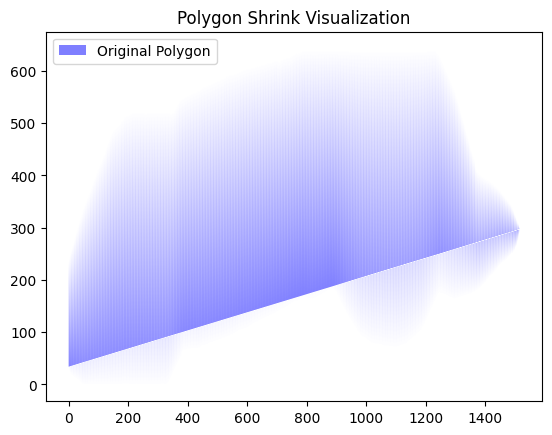

In [8]:
distance = 5
polygon = mask_to_polygon(~mask)
new_polygon = polygon.buffer(distance)


visualize_polygons(polygon, new_polygon)

In [12]:
new_mask = coords_in_poly(list(polygon.exterior.coords), mask.shape)
new_mask

In [55]:
import numpy as np
from matplotlib.path import Path
from shapely.geometry import Polygon
from scipy import ndimage
from qa_qc_lib.qa_qc_seismic import QA_QC_seismic
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def find_border(mask):
    # Создаем 3x3 ядро (kernel) с единицами
    kernel = np.ones((3, 3))

    # Применяем свертку к маске с ядром
    conv_result = convolve2d(mask, kernel, mode='same')

    # Идентифицируем границы: все пиксели в результирующем изображении, которые меньше 9
    # (и соответствующие пиксели в исходной маске равны True), являются границами.
    border = np.logical_and(conv_result < 9, mask)
    
    return border


def compute_variance(arr):
    # Вычисляем среднее значение
    mean_val = np.mean(arr)
    
    # Вычисляем дисперсию
    variance = np.mean((arr - mean_val) ** 2)
    
    return variance



compute_variance(seismic_cube[border_mask])

file_path = 'data/Глубинный куб NP cropped'
seism_data_qa_qc = QA_QC_seismic(file_path=file_path)





In [107]:
from scipy.signal import convolve2d

def find_border(mask):
    # Создаем 3x3 ядро (kernel) с единицами
    kernel = np.ones((3, 3))
    # Применяем свертку к маске с ядром
    conv_result = convolve2d(mask, kernel, mode='same')
    # Идентифицируем границы: все пиксели в результирующем изображении, которые меньше 9
    # (и соответствующие пиксели в исходной маске равны True), являются границами.
    border = np.logical_and(conv_result < 9, mask)
    return border


def compute_variance(arr):
    # Вычисляем среднее значение
    mean_val = np.mean(arr)
    # Вычисляем дисперсию
    variance = np.mean((arr - mean_val) ** 2)
    return variance


# Создаём маску которая будет отражать наличие сейсмотрасс, а значит и геометрию сейсмополя
seismic_cube = seism_data_qa_qc.seismic_cube.copy()
seismic_cube_r = seismic_cube.reshape(-1, seismic_cube.shape[2])
mask = np.all(seismic_cube_r == 0, axis=1)
mask = mask.reshape((seismic_cube.shape[0], seismic_cube.shape[1]))

# Создаём маску которая будет хранить условниые классы (0 - сейсмотрассы отсутствуют, 
#                                                       1 - сейсмотрассы присутствуют / основная часть куба, 
#                                                       2 - сейсмотрассы присутствуют / краевая часть куба )
numeric_mask = (~mask).astype(int)
# Далее итеративно расширяем границы краевой зоны и обсчитываем для неё дисперсию
variance_list = []
while (numeric_mask==1).sum() > 95655:    # Условие остановки
    # find_border определяет пиксели/дискреты лежащие на границе полигона, после чего они переклассифицируются в краевую чать куба
    numeric_mask[find_border(numeric_mask==1)] = 2  
    variance = compute_variance(seismic_cube[numeric_mask==2])
    variance_list.append(variance)
    print((numeric_mask==1).sum(), variance)


676659 1617508.8
672047 1720421.2
667457 1807432.1
662881 1884600.1
658317 1949360.9
653764 2013024.6
649229 2075065.0
644705 2137319.0
640193 2200857.5
635691 2263626.0
631198 2326916.2
626717 2387554.8
622250 2441871.5
617792 2492998.5
613343 2543889.5
608903 2593957.8
604475 2644352.8
600060 2692625.2
595655 2737771.0
591260 2779641.8
586876 2818822.2
582504 2857315.0
578141 2894489.5
573787 2930707.8
569443 2966736.2
565107 3001044.5
560783 3032519.0
556469 3062020.8
552166 3088483.8
547873 3113355.0
543591 3137023.2
539321 3159292.5
535065 3181224.5
530817 3202388.2
526580 3222622.2
522352 3241996.2
518135 3259375.0
513930 3275214.0
509734 3289502.0
505548 3303326.2
501373 3317161.2
497209 3330515.2
493056 3343180.2
488914 3354841.5
484786 3364484.0
480669 3373465.5
476562 3381891.5
472465 3389975.2
468380 3398146.0
464307 3406189.0
460244 3413599.2
456192 3420620.2
452151 3426761.5
448122 3432685.0
444107 3438011.8
440103 3442996.2
436111 3448651.8
432127 3454779.0
428157 3460760

In [112]:
all_results_dict = {}

all_results_dict["result"] = 'Fail'

timestamp = "%Y-%m-%d %H:%M:%S"

all_results_dict | {"file_name": "file_name", "date": timestamp}

{'result': 'Fail', 'file_name': 'file_name', 'date': '%Y-%m-%d %H:%M:%S'}

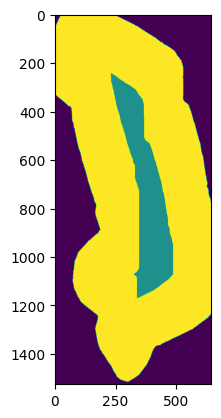

In [108]:
plt.imshow(numeric_mask)
plt.show()

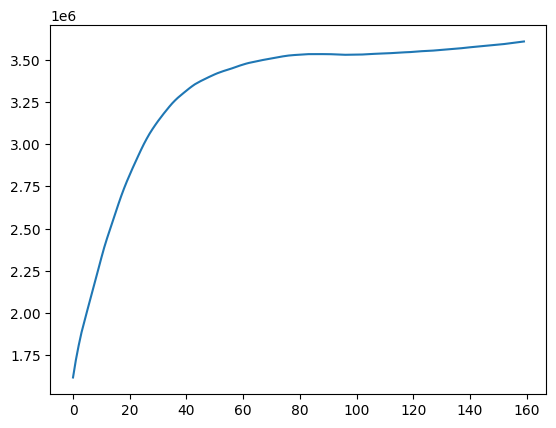

In [110]:
plt.plot(variance_list)
plt.show()